<a href="https://www.analytiksinc.com">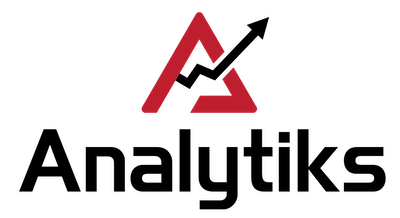</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# Clustering stocks using K Means

<b>Dataset:</b> <i> Company Stock Movements.csv</i>

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

#### Normalizer vs StandardScaler 
Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Additional Libraries

In [2]:
#Principal Component Analysis
from sklearn.decomposition import PCA

#Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#Clustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

#PCA
from sklearn.decomposition import PCA

#3d projection
from mpl_toolkits import mplot3d

#Notebook and plot theme
import jupyterthemes as jt
from jupyterthemes import jtplot

### Modify notebook

In [3]:
%matplotlib inline

!jt -T -N -t oceans16 -fs 13 -nfs 13 -tfs 13 -dfs 13 -ofs 13 -cellw 950
jtplot.style(theme='oceans16')

## Load and Explore the Dataset

In [4]:
df = pd.read_csv('Company Stock Movements.csv')
df = df.rename(columns={'Unnamed: 0' : 'Company'})

In [5]:
df.shape

(60, 964)

In [6]:
df.describe()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197502,-0.202501,-0.097504,-0.035000
50%,0.295000,0.010001,-0.005000,0.084993,0.150000,-0.059998,0.070000,0.205002,0.139999,-0.360000,...,0.335005,0.454998,0.035002,0.000000,0.175000,-0.085000,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.804999,1.139999,0.345000,0.192502,0.577495,0.147498,0.382501,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


In [7]:
df.head()

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


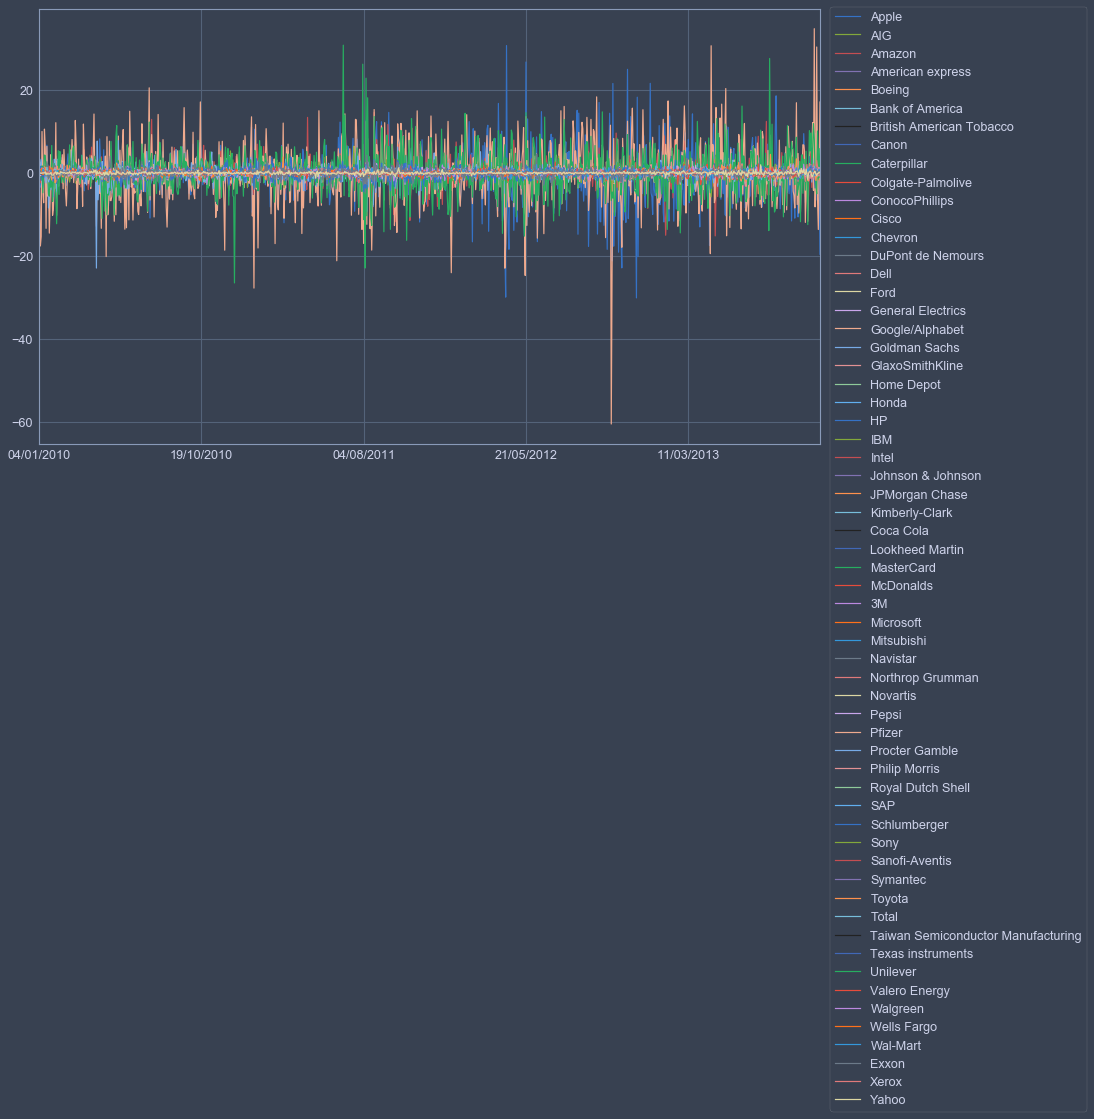

In [8]:
#Visualize data as time series

#Transpose dataframe and change index
df_plot = df.set_index('Company').transpose()

#Generate plot
df_plot.plot(figsize=(14,8))
plt.legend(loc='upper right', bbox_to_anchor=(1.35,1.02))
plt.show()

## Normalize the Dataset
In scaling, you’re changing the range of your data while in normalization you’re changing the shape of the distribution of your data.
<br>
[Reference](https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization)

In [9]:
#Separating out the features (date columns)
x = df.iloc[:, 1:].values
#Separating out the target (company name)
y = df.iloc[:, 0].values

In [10]:
#Normalize dataset
transformer = Normalizer().fit(x)  #fit does nothing
transformer.transform(x) #transforms values per observation

#Convert normalized x values to dataframe
df_norm = pd.DataFrame(x)

#Add target column to dataframe
df_norm = pd.concat([pd.Series(y), df_norm], axis=1)

#Copy headers from original dataframe
df_norm.columns = df.columns

df_norm

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


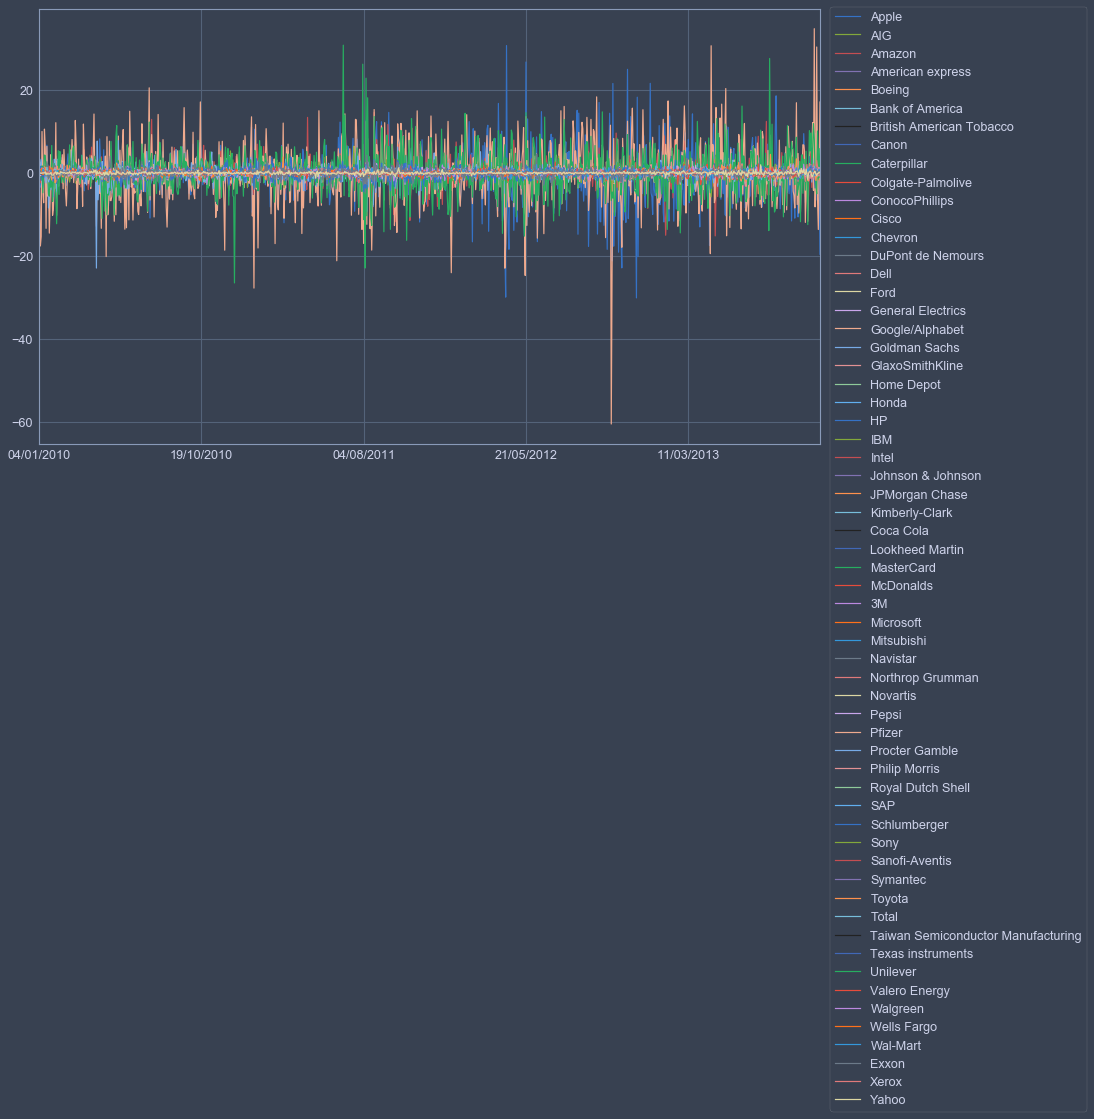

In [11]:
#Visualize normalized data as time series

#Transpose dataframe and change index
df_norm_plot = df_norm.set_index('Company').transpose()

#Generate plot
df_norm_plot.plot(figsize=(14,8))
plt.legend(loc='upper right', bbox_to_anchor=(1.35,1.02))
plt.show()

Visually inspecting the data, there are some companies that have greater movements than others. These are __Apple, Google/Alphabet, and MasterCard.__ __Amazon__ is also noticeable but movements are not as drastic as the first three mentioned.

In [12]:
#Inspect original values of possible unique clusters
outliers = df.set_index('Company').loc[['Apple', 'Google/Alphabet', 
                                        'MasterCard', 'Amazon'],:]

outliers

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
Google/Alphabet,-0.199995,-3.189984,-17.599998,-15.299993,10.020000,-3.349979,-7.170008,10.599985,5.949977,-13.340041,...,12.160008,-4.200020,34.830004,-8.159984,2.000013,30.409929,-6.320089,-13.620034,-0.199995,17.139948
MasterCard,-1.149998,-1.760006,-0.680007,0.489997,1.650009,-4.770012,0.070000,4.340000,4.230003,0.839996,...,6.040040,11.949997,8.190003,0.819931,-3.080063,-5.029984,10.140000,-1.220016,5.910034,-0.999985
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021


## Principal Component Analysis

### Test for 3 PC

In [13]:
#Get the first 3 PCA components only
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [14]:
#Output of PCA is a 3-dimensional array
principalComponents 

#Put array into a neat DataFrame
pca_df = pd.DataFrame(data = principalComponents, 
                      columns = ['PC 1', 'PC 2', 'PC 3'])  

#Add target column to the transformed DataFrame by using the Pandas concat() function 
pca_df = pd.concat([pca_df, df.iloc[:,0]], axis = 1)

pca_df.head()

,PC 1,PC 2,PC 3,Company
0,121.887764,126.339091,-46.118917,Apple
1,-6.814297,-1.146626,-0.475470,AIG
2,41.731214,-3.004529,17.738332,Amazon
3,-5.093771,-1.473215,2.208347,American express
4,-2.928816,-0.803747,2.009675,Boeing


## Explained Variance
<p>The explained variance tells us how much information (variance) can be attributed to each of the principal components.</p>

In [15]:
explained_var_ratio = pca.explained_variance_ratio_
explained_var = pca.explained_variance_ratio_.sum() * 100
print('Given this value, it can be said that %.2f%s of the variance of our data is explained by these 3 Principal Components' % (explained_var, '%'))

Given this value, it can be said that 82.69% of the variance of our data is explained by these 3 Principal Components


### Visualize 3D projection

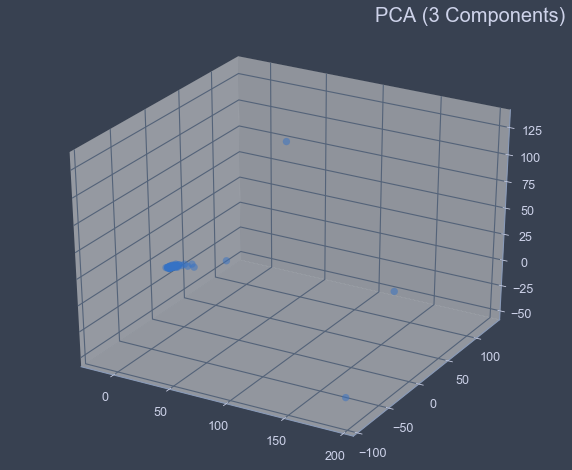

In [16]:
#Set up figure object
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_title('PCA (3 Components)', fontsize=20, loc='right')

#Assign PCA on x, y, z axes
xdata = pca_df['PC 1']
ydata = pca_df['PC 2']
zdata = pca_df['PC 3']

#Plot
ax.scatter3D(xdata, ydata, zdata, s=50, alpha=0.5, cmap='hot')

### Test for 2 PC

In [17]:
#Get the first 2 PCA components only
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [18]:
#Output of PCA is a 2-dimensional array
principalComponents 

#Put array into a neat DataFrame
pca_df = pd.DataFrame(data = principalComponents, 
                      columns = ['PC 1', 'PC 2'])  

#Add target column to the transformed DataFrame by using the Pandas concat() function 
pca_df = pd.concat([pca_df, df.iloc[:,0]], axis = 1)

pca_df.head()

,PC 1,PC 2,Company
0,121.887764,126.339091,Apple
1,-6.814297,-1.146626,AIG
2,41.731214,-3.004529,Amazon
3,-5.093771,-1.473215,American express
4,-2.928816,-0.803747,Boeing


### Visualize 2D projection

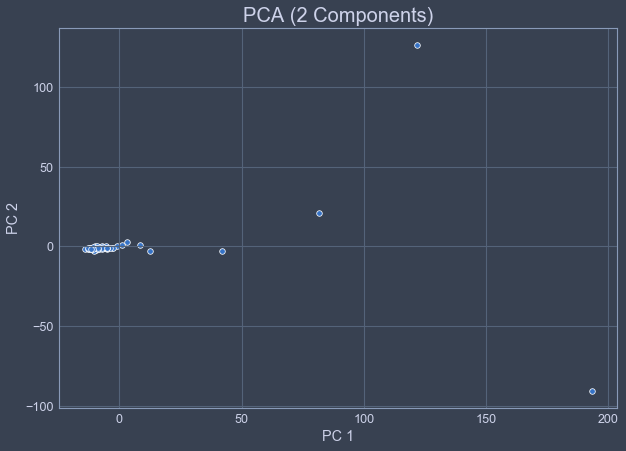

In [19]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('PCA (2 Components)', fontsize=20)
sns.scatterplot(ax = ax, x=pca_df['PC 1'], y=pca_df['PC 2'], legend=False)

## Explained Variance
<p>The explained variance tells us how much information (variance) can be attributed to each of the principal components.</p>

In [20]:
explained_var_ratio = pca.explained_variance_ratio_
explained_var = pca.explained_variance_ratio_.sum() * 100
print('Given this value, it can be said that %.2f%s of the variance of our data is explained by these 2 Principal Components' % (explained_var, '%'))

Given this value, it can be said that 67.45% of the variance of our data is explained by these 2 Principal Components


While 3 PC has higher explained variance than 2 PC, it doesn't necessarily present clusters better than the latter. Both plots show lumped data points and 3-4 separated ones. To keep the model simple, we will continue plotting on a 2D plane. Optimal k values could either be 4 or 5. This is also consistent with the results of inspection we did on the time series visualization.

## Find the optimal k

In [21]:
#Set range for k
range_n_clusters= range(1,10)

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=30) 
    kmeans.fit(x)
    score = kmeans.inertia_ #inertia is sum of squared errors
    scores.append(score)
    print(str(i) +"\t" +str(score))

1	133634.07227065778
2	79397.95447829989
3	51411.389357376116
4	27001.342216992227
5	16922.759963240384
6	13106.539972930323
7	11044.085783223778
8	9869.943157855661
9	9222.557958153237


Text(0,0.5,'Score')

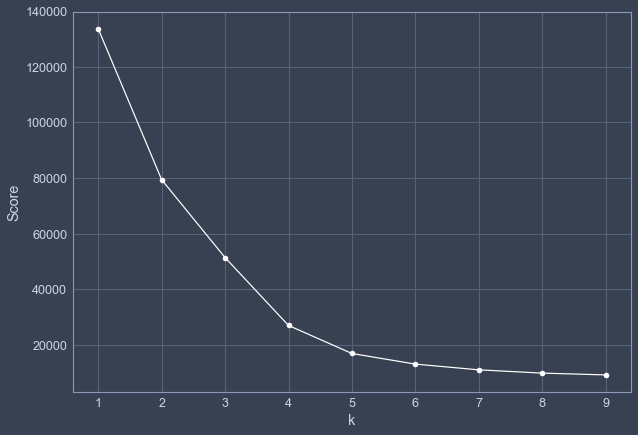

In [22]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o', c='white')
plt.xlabel("k")
plt.ylabel("Score")

## Run K Means (n_clusters=4)

In [23]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(x)

#Output of K-Means is the cluster label
k4_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k4 = df.copy()
df_k4['Label'] = k4_labels

#View the dataset
#Values are sorted to check which companies are outside Cluster_0
df_k4.sort_values('Label', ascending=False).head()

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
30,MasterCard,-1.149998,-1.760006,-0.680007,0.489997,1.650009,-4.770012,0.070000,4.340000,4.230003,...,11.949997,8.190003,0.819931,-3.080063,-5.029984,10.140000,-1.220016,5.910034,-0.999985,3
17,Google/Alphabet,-0.199995,-3.189984,-17.599998,-15.299993,10.020000,-3.349979,-7.170008,10.599985,5.949977,...,-4.200020,34.830004,-8.159984,2.000013,30.409929,-6.320089,-13.620034,-0.199995,17.139948,2
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,1
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001,0
32,3M,-0.069999,-0.300003,-0.209999,0.410003,0.629998,-0.399994,0.470001,-0.330002,-0.239998,...,1.880005,-0.030007,0.459999,0.440002,-0.230003,0.529999,1.369995,0.790001,0.199997,0


Mastercard, Google/Alphabet, and Apple are on their separate clusters. The remaining 57 companies are in Cluster_0.

### Cluster Analysis

In [24]:
#Check the size of each cluster
df_k4.Label.value_counts()

0    57
3     1
2     1
1     1
Name: Label, dtype: int64

In [25]:
df_k4[(df_k4.Label == 1)]

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
0,Apple,0.58,-0.220005,-3.409998,-1.17,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,1


In [26]:
df_k4[(df_k4.Label == 2)]

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
17,Google/Alphabet,-0.199995,-3.189984,-17.599998,-15.299993,10.02,-3.349979,-7.170008,10.599985,5.949977,...,-4.20002,34.830004,-8.159984,2.000013,30.409929,-6.320089,-13.620034,-0.199995,17.139948,2


In [27]:
df_k4[(df_k4.Label == 3)]

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
30,MasterCard,-1.149998,-1.760006,-0.680007,0.489997,1.650009,-4.770012,0.07,4.34,4.230003,...,11.949997,8.190003,0.819931,-3.080063,-5.029984,10.14,-1.220016,5.910034,-0.999985,3


In [28]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k4, index=['Label'], 
               values=df_k4.drop(columns=['Company', 'Label']), 
               aggfunc=[np.mean,np.min, np.max])

mean                                                         \
      01/02/2010 01/02/2011 01/02/2012 01/02/2013 01/03/2010 01/03/2011   
Label                                                                     
0       0.242807   0.396842   0.175439   0.132807   0.291930  -0.880833   
1       2.360001   3.730018  -2.220024  -5.490006   3.240008  -6.160007   
2      -1.580023   6.550024  -4.109961  17.400002   3.489976 -17.019950   
3       2.289982   7.840004  -0.620003  -2.100029   6.800003  -2.150002   

                                                   ...       amax             \
      01/03/2012 01/03/2013 01/04/2010 01/04/2011  ... 31/05/2013 31/07/2012   
Label                                              ...                         
0       0.196141   0.409123  -0.012982   0.009649  ...   3.200012   0.640000   
1      -3.700005  -7.529998  -1.440006  -6.550003  ...  -2.769997   7.529999   
2       0.139996   8.390040  -2.549998   3.039987  ...   3.099985   4.709946   
3      -2.060012   3.300018  -1.610012   1.539993  ...  -4.949990  -6.449966   

                                                                         \
      31/07/2013 31/08/2010 31/08/2011 31/08/2012 31/10/2011 31/10/2012   
Label                                                                     
0       1.500000   1.980004   2.959992   0.750000   0.650002   2.659996   
1      -2.460029   1.250015  -5.739998  -2.009980   2.360001   0.440010   
2      -5.240055  -0.089998  -3.779969   1.089973  -2.450001   0.439989   
3     -13.880005  -3.640004  -3.229980   0.600014  -3.910027   8.409996   

                             
      31/12/2010 31/12/2012  
Label                        
0       1.080002   7.119995  
1      -0.389995  21.640015  
2      -2.769994   7.380003  
3       0.579987   7.909966  

[4 rows x 2889 columns]

#### Visualize as scatter plot

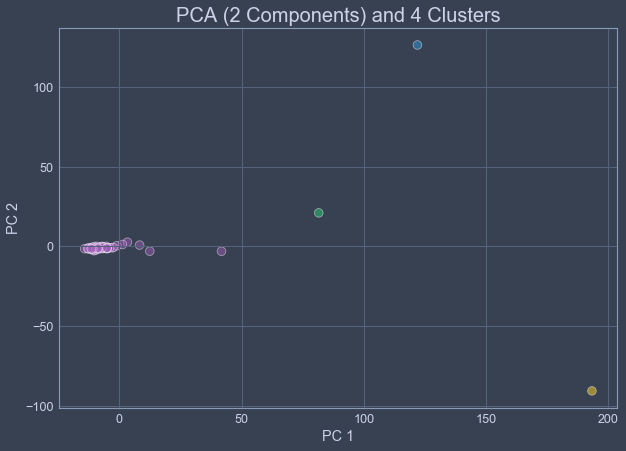

In [29]:
colors = ['#9b59b6', '#3498db', '#ffd321', '#2ecc71', '#e74c3c']

#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('PCA (2 Components) and 4 Clusters', fontsize=20)
sns.scatterplot(ax = ax, x=pca_df['PC 1'], y=pca_df['PC 2'], hue=df_k4['Label'], 
                s=75, alpha=0.5, palette=sns.color_palette(colors[:4]), legend=False)

#### Visualize as time series

In [30]:
#Attach labels to the normalized DataFrame
df_norm_lab = df_norm.copy()
df_norm_lab['Label'] = k4_labels
df_norm_lab = df_norm_lab.set_index('Company')

#Make a copy
df_norm_lab_k4 = df_norm_lab.copy()

#Group data based labels
Cluster_0 = df_norm_lab_k4[df_norm_lab_k4['Label'] == 0].iloc[:,:-2].transpose()
Cluster_1 = df_norm_lab_k4[df_norm_lab_k4['Label'] == 1].iloc[:,:-2].transpose()
Cluster_2 = df_norm_lab_k4[df_norm_lab_k4['Label'] == 2].iloc[:,:-2].transpose()
Cluster_3 = df_norm_lab_k4[df_norm_lab_k4['Label'] == 3].iloc[:,:-2].transpose()

__Cluster_0__

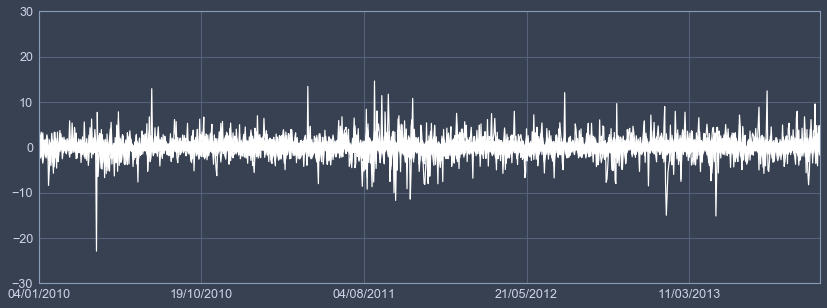

In [31]:
Cluster_0.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

__Cluster_1 (Apple)__

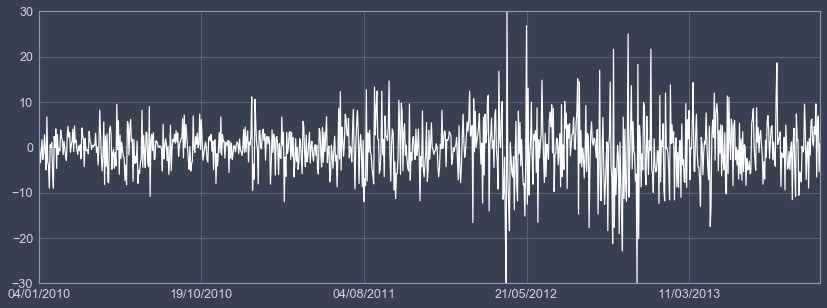

In [32]:
Cluster_1.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

__Cluster_2 (Google/Alphabet)__

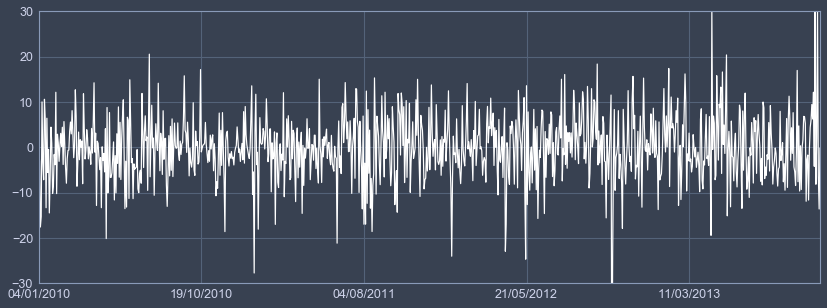

In [33]:
Cluster_2.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

__Cluster_3 (MasterCard)__

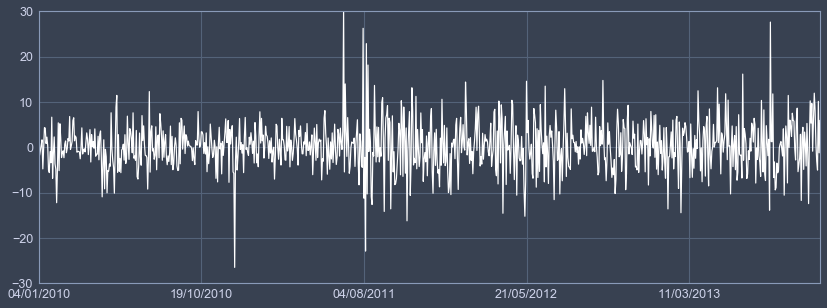

In [34]:
Cluster_3.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

### Cluster Profiles
<br>

| Cluster | Company |  General movement range | Stability | Profile |
| --- | --- | --- | --- | --- |
| Cluster_0 | Most companies | Between ±8 | High | Low risk, low reward; safe for beginners |
| Cluster_1 | Apple | Between ±10 | Low | High risk, high reward; stock movement is sensitive to products' release and market performance |
| Cluster_2 | Google/Alphabet | Between ±15 | Mid | Low risk, high reward; good for those who want to try more expensive stocks but stay on the safer side
| Cluster_3 | MasterCard | Between ±10 | Low | High risk, high reward; ideal for those with farmer's mindset and willing to wait for occasional but high-reward spikes |

## Run K Means (n_clusters=5)

In [35]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(x)

#Output of K-Means is the cluster label
k5_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k5 = df.copy()
df_k5['Label'] = k5_labels

#View the dataset
#Values are sorted to check which companies are outside Cluster_0
df_k5.sort_values('Label', ascending=False).head()

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021,4
30,MasterCard,-1.149998,-1.760006,-0.680007,0.489997,1.650009,-4.770012,0.070000,4.340000,4.230003,...,11.949997,8.190003,0.819931,-3.080063,-5.029984,10.140000,-1.220016,5.910034,-0.999985,3
17,Google/Alphabet,-0.199995,-3.189984,-17.599998,-15.299993,10.020000,-3.349979,-7.170008,10.599985,5.949977,...,-4.200020,34.830004,-8.159984,2.000013,30.409929,-6.320089,-13.620034,-0.199995,17.139948,2
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,1
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998,0


Mastercard, Google/Alphabet, Apple, and Amazon are on their separate clusters. The remaining 56 companies are in Cluster_0.

### Cluster Analysis

In [36]:
#Check the size of each cluster
df_k5.Label.value_counts()

0    56
4     1
3     1
2     1
1     1
Name: Label, dtype: int64

In [37]:
df_k5[(df_k5.Label == 1)]

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
0,Apple,0.58,-0.220005,-3.409998,-1.17,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,1


In [38]:
df_k5[(df_k5.Label == 2)]

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
17,Google/Alphabet,-0.199995,-3.189984,-17.599998,-15.299993,10.02,-3.349979,-7.170008,10.599985,5.949977,...,-4.20002,34.830004,-8.159984,2.000013,30.409929,-6.320089,-13.620034,-0.199995,17.139948,2


In [39]:
df_k5[(df_k5.Label == 3)]

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
30,MasterCard,-1.149998,-1.760006,-0.680007,0.489997,1.650009,-4.770012,0.07,4.34,4.230003,...,11.949997,8.190003,0.819931,-3.080063,-5.029984,10.14,-1.220016,5.910034,-0.999985,3


In [40]:
df_k5[(df_k5.Label == 4)]

,Company,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021,4


In [41]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k5, index=['Label'], 
               values=df_k5.drop(columns=['Company', 'Label']), 
               aggfunc=[np.mean,np.min, np.max])

mean                                                         \
      01/02/2010 01/02/2011 01/02/2012 01/02/2013 01/03/2010 01/03/2011   
Label                                                                     
0       0.324108   0.375536   0.077678   0.205357   0.192857  -0.823527   
1       2.360001   3.730018  -2.220024  -5.490006   3.240008  -6.160007   
2      -1.580023   6.550024  -4.109961  17.400002   3.489976 -17.019950   
3       2.289982   7.840004  -0.620003  -2.100029   6.800003  -2.150002   
4      -4.309997   1.589997   5.650009  -3.929993   5.840004  -4.089997   

                                                   ...       amax             \
      01/03/2012 01/03/2013 01/04/2010 01/04/2011  ... 31/05/2013 31/07/2012   
Label                                              ...                         
0       0.196965   0.372322   0.058036   0.035714  ...   0.099998   0.640000   
1      -3.700005  -7.529998  -1.440006  -6.550003  ...  -2.769997   7.529999   
2       0.139996   8.390040  -2.549998   3.039987  ...   3.099985   4.709946   
3      -2.060012   3.300018  -1.610012   1.539993  ...  -4.949990  -6.449966   
4       0.149994   2.470001  -3.990005  -1.449997  ...   3.200012  -1.800003   

                                                                         \
      31/07/2013 31/08/2010 31/08/2011 31/08/2012 31/10/2011 31/10/2012   
Label                                                                     
0       1.500000   1.020005   1.050003   0.750000   0.650002   2.659996   
1      -2.460029   1.250015  -5.739998  -2.009980   2.360001   0.440010   
2      -5.240055  -0.089998  -3.779969   1.089973  -2.450001   0.439989   
3     -13.880005  -3.640004  -3.229980   0.600014  -3.910027   8.409996   
4      -2.690003   1.980004   2.959992   0.199997  -2.279998  -3.430008   

                             
      31/12/2010 31/12/2012  
Label                        
0       1.080002   2.800003  
1      -0.389995  21.640015  
2      -2.769994   7.380003  
3       0.579987   7.909966  
4      -1.960007   7.119995  

[5 rows x 2889 columns]

#### Visualize as scatter plot

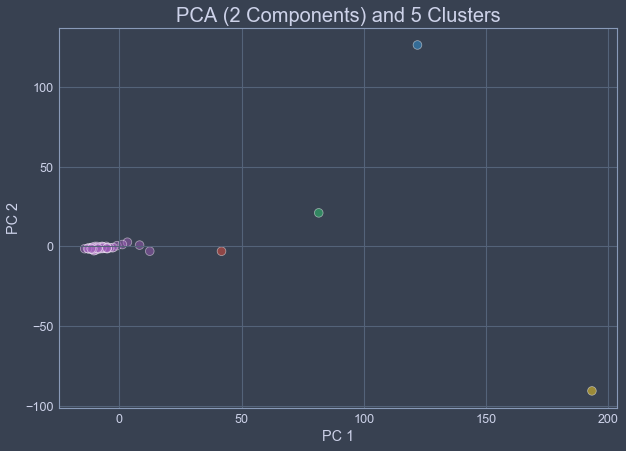

In [42]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('PCA (2 Components) and 5 Clusters', fontsize=20)
sns.scatterplot(ax = ax, x=pca_df['PC 1'], y=pca_df['PC 2'], hue=df_k5['Label'], 
                s=75, alpha=0.5, palette=sns.color_palette(colors), legend=False)

#### Visualize as time series

In [43]:
#Attach labels to the normalized DataFrame
df_norm_lab = df_norm.copy()
df_norm_lab['Label'] = k5_labels
df_norm_lab = df_norm_lab.set_index('Company')

#Make a copy
df_norm_lab_k5 = df_norm_lab.copy()

#Group data based labels
Cluster_0 = df_norm_lab_k5[df_norm_lab_k5['Label'] == 0].iloc[:,:-2].transpose()
Cluster_1 = df_norm_lab_k5[df_norm_lab_k5['Label'] == 1].iloc[:,:-2].transpose()
Cluster_2 = df_norm_lab_k5[df_norm_lab_k5['Label'] == 2].iloc[:,:-2].transpose()
Cluster_3 = df_norm_lab_k5[df_norm_lab_k5['Label'] == 3].iloc[:,:-2].transpose()
Cluster_4 = df_norm_lab_k5[df_norm_lab_k5['Label'] == 4].iloc[:,:-2].transpose()

__Cluster_0__

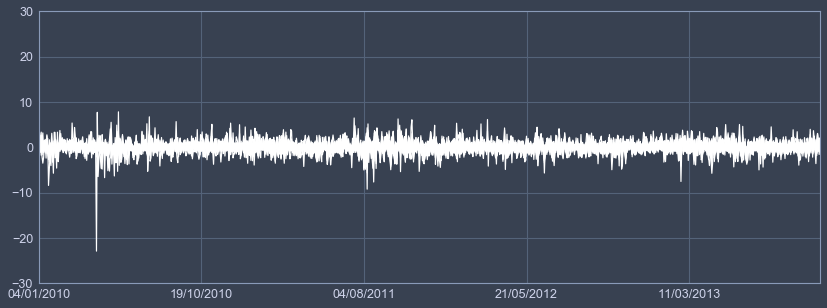

In [44]:
Cluster_0.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

__Cluster_1 (Apple)__

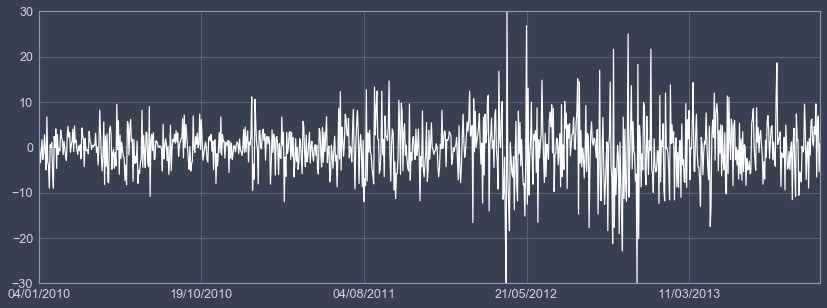

In [45]:
Cluster_1.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

In [46]:
#Get peak dates for Apple
outliers.transpose().sort_values('Apple', ascending=False).head(5)

Company,Apple,Google/Alphabet,MasterCard,Amazon
17/04/2012,30.760009,1.009975,3.610001,1.179992
21/05/2012,26.779999,13.600034,14.580002,4.080002
19/11/2012,25.020012,12.510000,9.280014,1.390000
31/12/2012,21.640015,7.380003,7.909966,7.119995
22/10/2012,21.610001,-2.340003,-6.049995,-5.029999


In [47]:
#Get floor dates for Apple
outliers.transpose().sort_values('Apple').head(5)

Company,Apple,Google/Alphabet,MasterCard,Amazon
05/12/2012,-30.119995,-4.330017,-5.000000,1.520005
16/04/2012,-29.929978,-16.929953,-8.210030,-3.509995
08/11/2012,-22.879989,-17.909989,-2.519989,-4.869995
19/10/2012,-21.209992,-23.790030,-4.570008,-5.160004
07/12/2012,-20.149994,-10.789981,-5.559997,-0.869995


Apple is less stable than other companies. Stock price movements peaked on select dates in 2012.
<br>
<br>
__Apple's Media Events from 2012 around the time of peaks__
##### 1. Apple Special Event (March 7, 2012)
- os release: __iOS 5.1__
- product releases: __3rd gen Apple TV, 3rd gen iPad__
- Cook talks about 'post-PC-world'

##### 2. Apple Special Event (September 12, 2012)
- product release: __iPhone 5__ (thinnest and lightest iPhone, made of glass and aluminum, and best hardware engineered Apple product then)

##### 3. Apple Special Event (October 23, 2012)
- product releases: __iPad Mini (4th gen iPad), iMac, Macbook Pro 13" with Retina display__
<br>
<br>

References: [[1]](https://en.wikipedia.org/wiki/List_of_Apple_Inc._media_events) [[2]](https://www.cnet.com/news/apple-top-5-events-from-2012/)

__Cluster_2 (Google/Alphabet)__

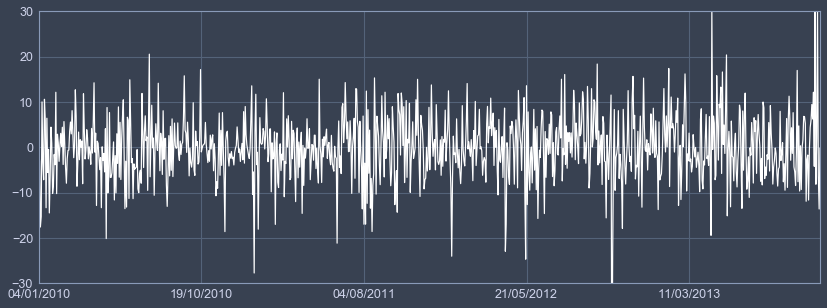

In [48]:
Cluster_2.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

__Cluster_3 (MasterCard)__

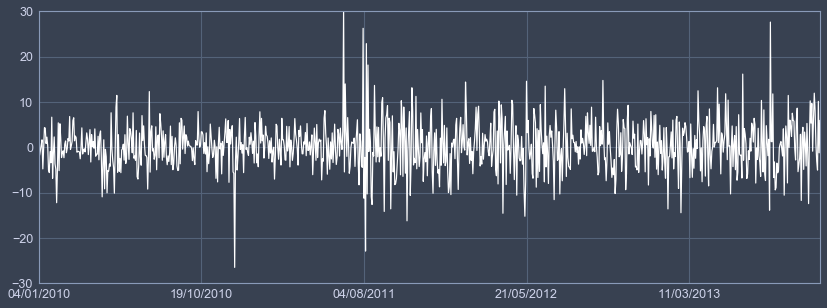

In [49]:
Cluster_3.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

__Cluster_4 (Amazon)__

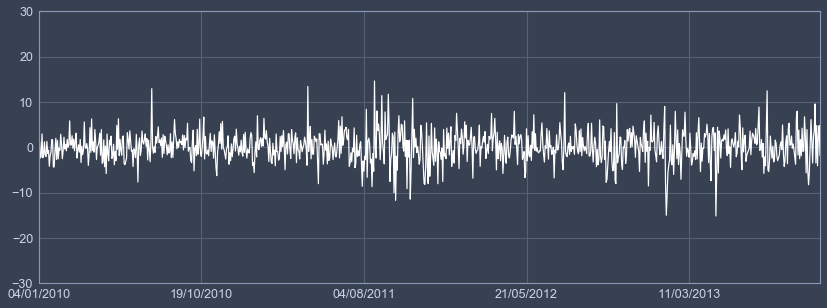

In [50]:
Cluster_4.plot(figsize=(14,5), legend=False, c='white', ylim=(-30,30))
plt.show()

### Cluster Profiles
<br>

| Cluster | Company |  General movement range | Stability | Profile |
| --- | --- | --- | --- | --- |
| Cluster_0 | Most companies | Between ±5 | High | Low risk, low reward; safe for beginners |
| Cluster_1 | Apple | Between ±10 | Low | High risk, high reward; stock movement is sensitive to products' release and market performance |
| Cluster_2 | Google/Alphabet | Between ±15 | Mid | Low risk, high reward; good for those who want to try more expensive stocks but stay on the safer side
| Cluster_3 | MasterCard | Between ±10 | Low | High risk, high reward; ideal for those with farmer's mindset and willing to wait for occasional but high-reward spikes |
| Cluster_4 | Amazon | Between ±7 | Mid | Low risk, mid reward; ideal for beginners |

### List Stocks and their Labels / Clusters in a DataFrame to report which Stocks move together

#### Cluster_0

In [51]:
Cluster_0.transpose()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,15/10/2013,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,-1.239998,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005
Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,-0.150000,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000
British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,-0.680000,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002
Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,-0.030001,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001
Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,-0.489998,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001
Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,-0.540001,...,-0.279998,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003
ConocoPhillips,0.809991,-0.020006,0.340003,0.089988,0.650006,0.029999,-0.569995,0.549994,0.320001,0.190000,...,-0.010003,0.639999,0.730004,-0.150002,-0.479996,0.000000,-0.529999,0.720001,0.529999,-0.020005


#### Cluster_1

In [52]:
Cluster_1.transpose()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,15/10/2013,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
Apple,0.58,-0.220005,-3.409998,-1.17,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,1.16996,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019


#### Cluster_2

In [53]:
Cluster_2.transpose()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,15/10/2013,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
Google/Alphabet,-0.199995,-3.189984,-17.599998,-15.299993,10.02,-3.349979,-7.170008,10.599985,5.949977,-13.340041,...,6.24997,12.160008,-4.20002,34.830004,-8.159984,2.000013,30.409929,-6.320089,-13.620034,-0.199995


#### Cluster_3

In [54]:
Cluster_3.transpose()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,15/10/2013,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
MasterCard,-1.149998,-1.760006,-0.680007,0.489997,1.650009,-4.770012,0.07,4.34,4.230003,0.839996,...,-0.859986,6.04004,11.949997,8.190003,0.819931,-3.080063,-5.029984,10.14,-1.220016,5.910034


#### Cluster_4

In [55]:
Cluster_4.transpose()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,15/10/2013,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009


## Run Hierarchichal Clustering and Visualize as a Dendrogram

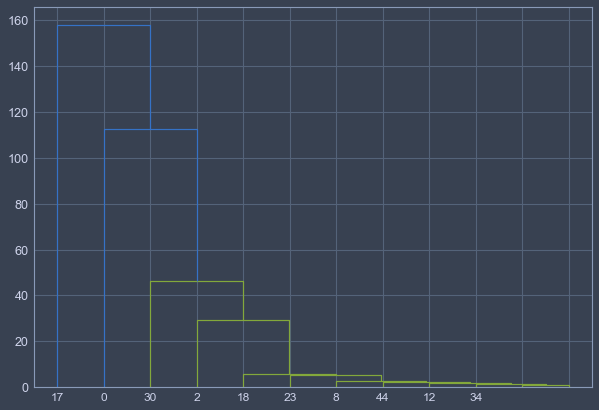

In [56]:
#Instantiate the Algorithm
#Linkage performs hierarchical/agglomerative clustering.
linked = hierarchy.linkage(pca_df.set_index('Company'), method='single') 

plt.figure(figsize=(10, 7))  
hierarchy.dendrogram(linked, orientation='top', p=10, 
                     distance_sort='descending', truncate_mode='level', 
                     show_leaf_counts=False)
plt.show()  

### Test with Max Cluster 5

In [57]:
k = 5
clusters_k_full = hierarchy.fcluster(linked, k, criterion='maxclust')

In [58]:
#Create the dataframe
pca_df_k = pca_df.copy()
pca_df_k['Label'] = clusters_k_full
pca_df_k.head()

,PC 1,PC 2,Company,Label
0,121.887764,126.339091,Apple,4
1,-6.814297,-1.146626,AIG,1
2,41.731214,-3.004529,Amazon,2
3,-5.093771,-1.473215,American express,1
4,-2.928816,-0.803747,Boeing,1


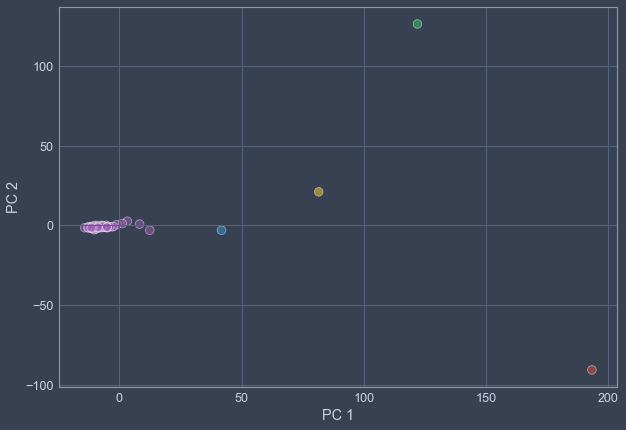

In [59]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(ax = ax, x=pca_df_k['PC 1'], y=pca_df_k['PC 2'], 
                hue = pca_df_k['Label'], s=75, alpha=0.5, 
                palette=sns.color_palette(colors), legend=False)

## Cluster Profiles
### Based on K Means (n_clusters=5) and Hierarchichal (k=5) Clustering
<br>

| Cluster | Company |  General movement range | Stability | Profile |
| --- | --- | --- | --- | --- |
| Cluster_0 | Most companies | Between ±5 | High | Low risk, low reward; safe for beginners |
| Cluster_1 | Apple | Between ±10 | Low | High risk, high reward; stock movement is sensitive to products' release and market performance |
| Cluster_2 | Google/Alphabet | Between ±15 | Mid | Low risk, high reward; good for those who want to try more expensive stocks but stay on the safer side
| Cluster_3 | MasterCard | Between ±10 | Low | High risk, high reward; ideal for those with farmer's mindset and willing to wait for occasional but high-reward spikes |
| Cluster_4 | Amazon | Between ±7 | Mid | Low risk, mid reward; ideal for beginners |